# Configurações iniciais

In [1]:
# LIBS
import os
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil import parser
import warnings 
warnings.filterwarnings('ignore') 

# CONFIGURAÇÕES

pd.set_option('display.max_rows',100) # Ajustando número máximo de linhas a serem exibidas por dataframes
pd.set_option('display.max_columns',100) # Ajustando número máximo de colunas a serem exibidas por dataframes
pd.set_option('display.width', 100) # Ajustando tamanho a ser exibido dos valores do dataframe
pd.set_option('display.float_format', lambda x: '%.4f' % x) # Ajustando o valor dos valores floats para 4 casas decimais
%config InlineBackend.figure_format = 'retina' # Ajustando a nitidez dos gráficos
SEED = 27 # Semente para reprodução de pseudo-aleatoriedade

# DIRETÓRIOS

project_data_path = '../data' # Diretório da base de dados

# Processamento dos dados

## Conhecendo os dados

- **Airline Name**: Nome da companhia aérea que o passageiro avaliou. 

- **Overall_Rating**: Avaliação geral do passageiro.

- **Review_Title**: Título do review. Normalmente, um resumo rápido do que o passageiro achou da experiência.

- **Review Date**: Data em que o review foi feito. 

- **Review**: O conteúdo textual do review, onde o passageiro descreve sua experiência. 

- **Aircraft**: Tipo ou modelo da aeronave usada no voo. 

- **Type Of Traveller**: Tipo de viajante.

- **Seat Type**: Classe do assento escolhido pelo passageiro.

- **Route**: A rota de voo.

- **Date Flown**: Data do voo.

- **Seat Comfort**: Avaliação do conforto do assento.

- **Cabin Staff Service**: Avaliação do serviço da equipe de cabine.

- **Food & Beverages**: Avaliação das comidas e bebidas oferecidas durante o voo. 

- **Ground Service**: Avaliação dos serviços em terra.

- **Inflight Entertainment**: Avaliação do sistema de entretenimento a bordo.

- **Wifi & Connectivity**: Avaliação da conectividade de internet durante o voo.

In [2]:
# Aqui faço a leitura da base de dados a partir da variável 'project_data_path', na pasta 'raw' e o arquivo 'Travel_Chalenge.csv'

df = pd.read_csv(os.path.join(project_data_path, 'raw', 'Travel_Chalenge.csv'), sep = ';')
df.sample(3) # Uma amostra aleatória de 3 registros dos dados

,Airline Name,Overall_Rating,Review_Title,Review Date,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity
9050,British Airways,1,"""cancelled the rebooked flight""",24th July 2023,I booked Premium Economy from INV to LAX (via...,NaN,Couple Leisure,Premium Economy,Inverness to Los Angeles via London,November 2022,NaN,NaN,NaN,NaN,NaN,NaN
9318,Thai Airways,1,"""flight was by far the best I've ever had""",24th October 2022,My experience with the last flight was so rem...,Boeing 777,Solo Leisure,Business Class,Bangkok to Frankfurt,September 2022,5.0000,5.0000,5.0000,5.0000,5.0000,NaN
10973,ANA All Nippon Airways,1,"""flight attendants are top-notch""",27th May 2023,ANA provides a good value in Premium Economy...,Boeing 777-300ER,Family Leisure,Premium Economy,Chicago to Tokyo Haneda,May 2023,5.0000,5.0000,5.0000,5.0000,4.0000,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17702 entries, 0 to 17701
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Airline Name            17702 non-null  object 
 1   Overall_Rating          17702 non-null  object 
 2   Review_Title            17702 non-null  object 
 3   Review Date             17702 non-null  object 
 4   Review                  17702 non-null  object 
 5   Aircraft                5665 non-null   object 
 6   Type Of Traveller       15953 non-null  object 
 7   Seat Type               17461 non-null  object 
 8   Route                   15876 non-null  object 
 9   Date Flown              15944 non-null  object 
 10  Seat Comfort            15456 non-null  float64
 11  Cabin Staff Service     15366 non-null  float64
 12  Food & Beverages        11924 non-null  float64
 13  Ground Service          15056 non-null  float64
 14  Inflight Entertainment  9231 non-null 

In [4]:
# Avaliando a quantidade de valores nulos e a quantidade de categorias em cada feature

for col in df.columns:
    print('-'*30)
    print('-' + col)
    print(f'Quantidade de valores nulos: {df[col].isnull().sum()}')
    print(f'Quantidade de categorias na feature: {df[col].nunique()}')
    print('-'*30)

------------------------------
-Airline Name
Quantidade de valores nulos: 0
Quantidade de categorias na feature: 182
------------------------------
------------------------------
-Overall_Rating
Quantidade de valores nulos: 0
Quantidade de categorias na feature: 10
------------------------------
------------------------------
-Review_Title
Quantidade de valores nulos: 0
Quantidade de categorias na feature: 14268
------------------------------
------------------------------
-Review Date
Quantidade de valores nulos: 0
Quantidade de categorias na feature: 3679
------------------------------
------------------------------
-Review
Quantidade de valores nulos: 0
Quantidade de categorias na feature: 17670
------------------------------
------------------------------
-Aircraft
Quantidade de valores nulos: 12037
Quantidade de categorias na feature: 835
------------------------------
------------------------------
-Type Of Traveller
Quantidade de valores nulos: 1749
Quantidade de categorias na f

In [5]:
df.duplicated().sum() # Verificando linhas duplicadas na base

np.int64(29)

## Realizando tratamentos nas colunas

### Colunas de avaliações

In [6]:
# Separando colunas referentes as avaliações dos serviços 
cols = ['Overall_Rating', 'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Inflight Entertainment', 'Wifi & Connectivity']

In [7]:
# Verificando as categorias das colunas de avaliação do serviço

for col in cols:
    print('-'*30)
    print('-' + col)
    print(f'Quantidade de categorias na feature: {df[col].nunique()}')
    print(f'Categorias na feature: {df[col].unique()}')
    print('-'*30)

------------------------------
-Overall_Rating
Quantidade de categorias na feature: 10
Categorias na feature: ['8' '1' '9' '7' '2' '3' '6' '5' '4' 'n']
------------------------------
------------------------------
-Seat Comfort
Quantidade de categorias na feature: 6
Categorias na feature: [nan  3.  4.  0.  2.  1.  5.]
------------------------------
------------------------------
-Cabin Staff Service
Quantidade de categorias na feature: 6
Categorias na feature: [nan  4.  0.  3.  1.  5.  2.]
------------------------------
------------------------------
-Food & Beverages
Quantidade de categorias na feature: 6
Categorias na feature: [nan  4.  0.  3.  1.  5.  2.]
------------------------------
------------------------------
-Ground Service
Quantidade de categorias na feature: 5
Categorias na feature: [nan  2.  5.  1.  3.  4.]
------------------------------
------------------------------
-Inflight Entertainment
Quantidade de categorias na feature: 6
Categorias na feature: [nan  2.  0.  1.  4

Percebe-se que há alguns valores inválidos distribuídos entre as categorias das variáveis de avaliações.  
- **O quão grande é a proporção de valores na categoria inválida das avaliações?**

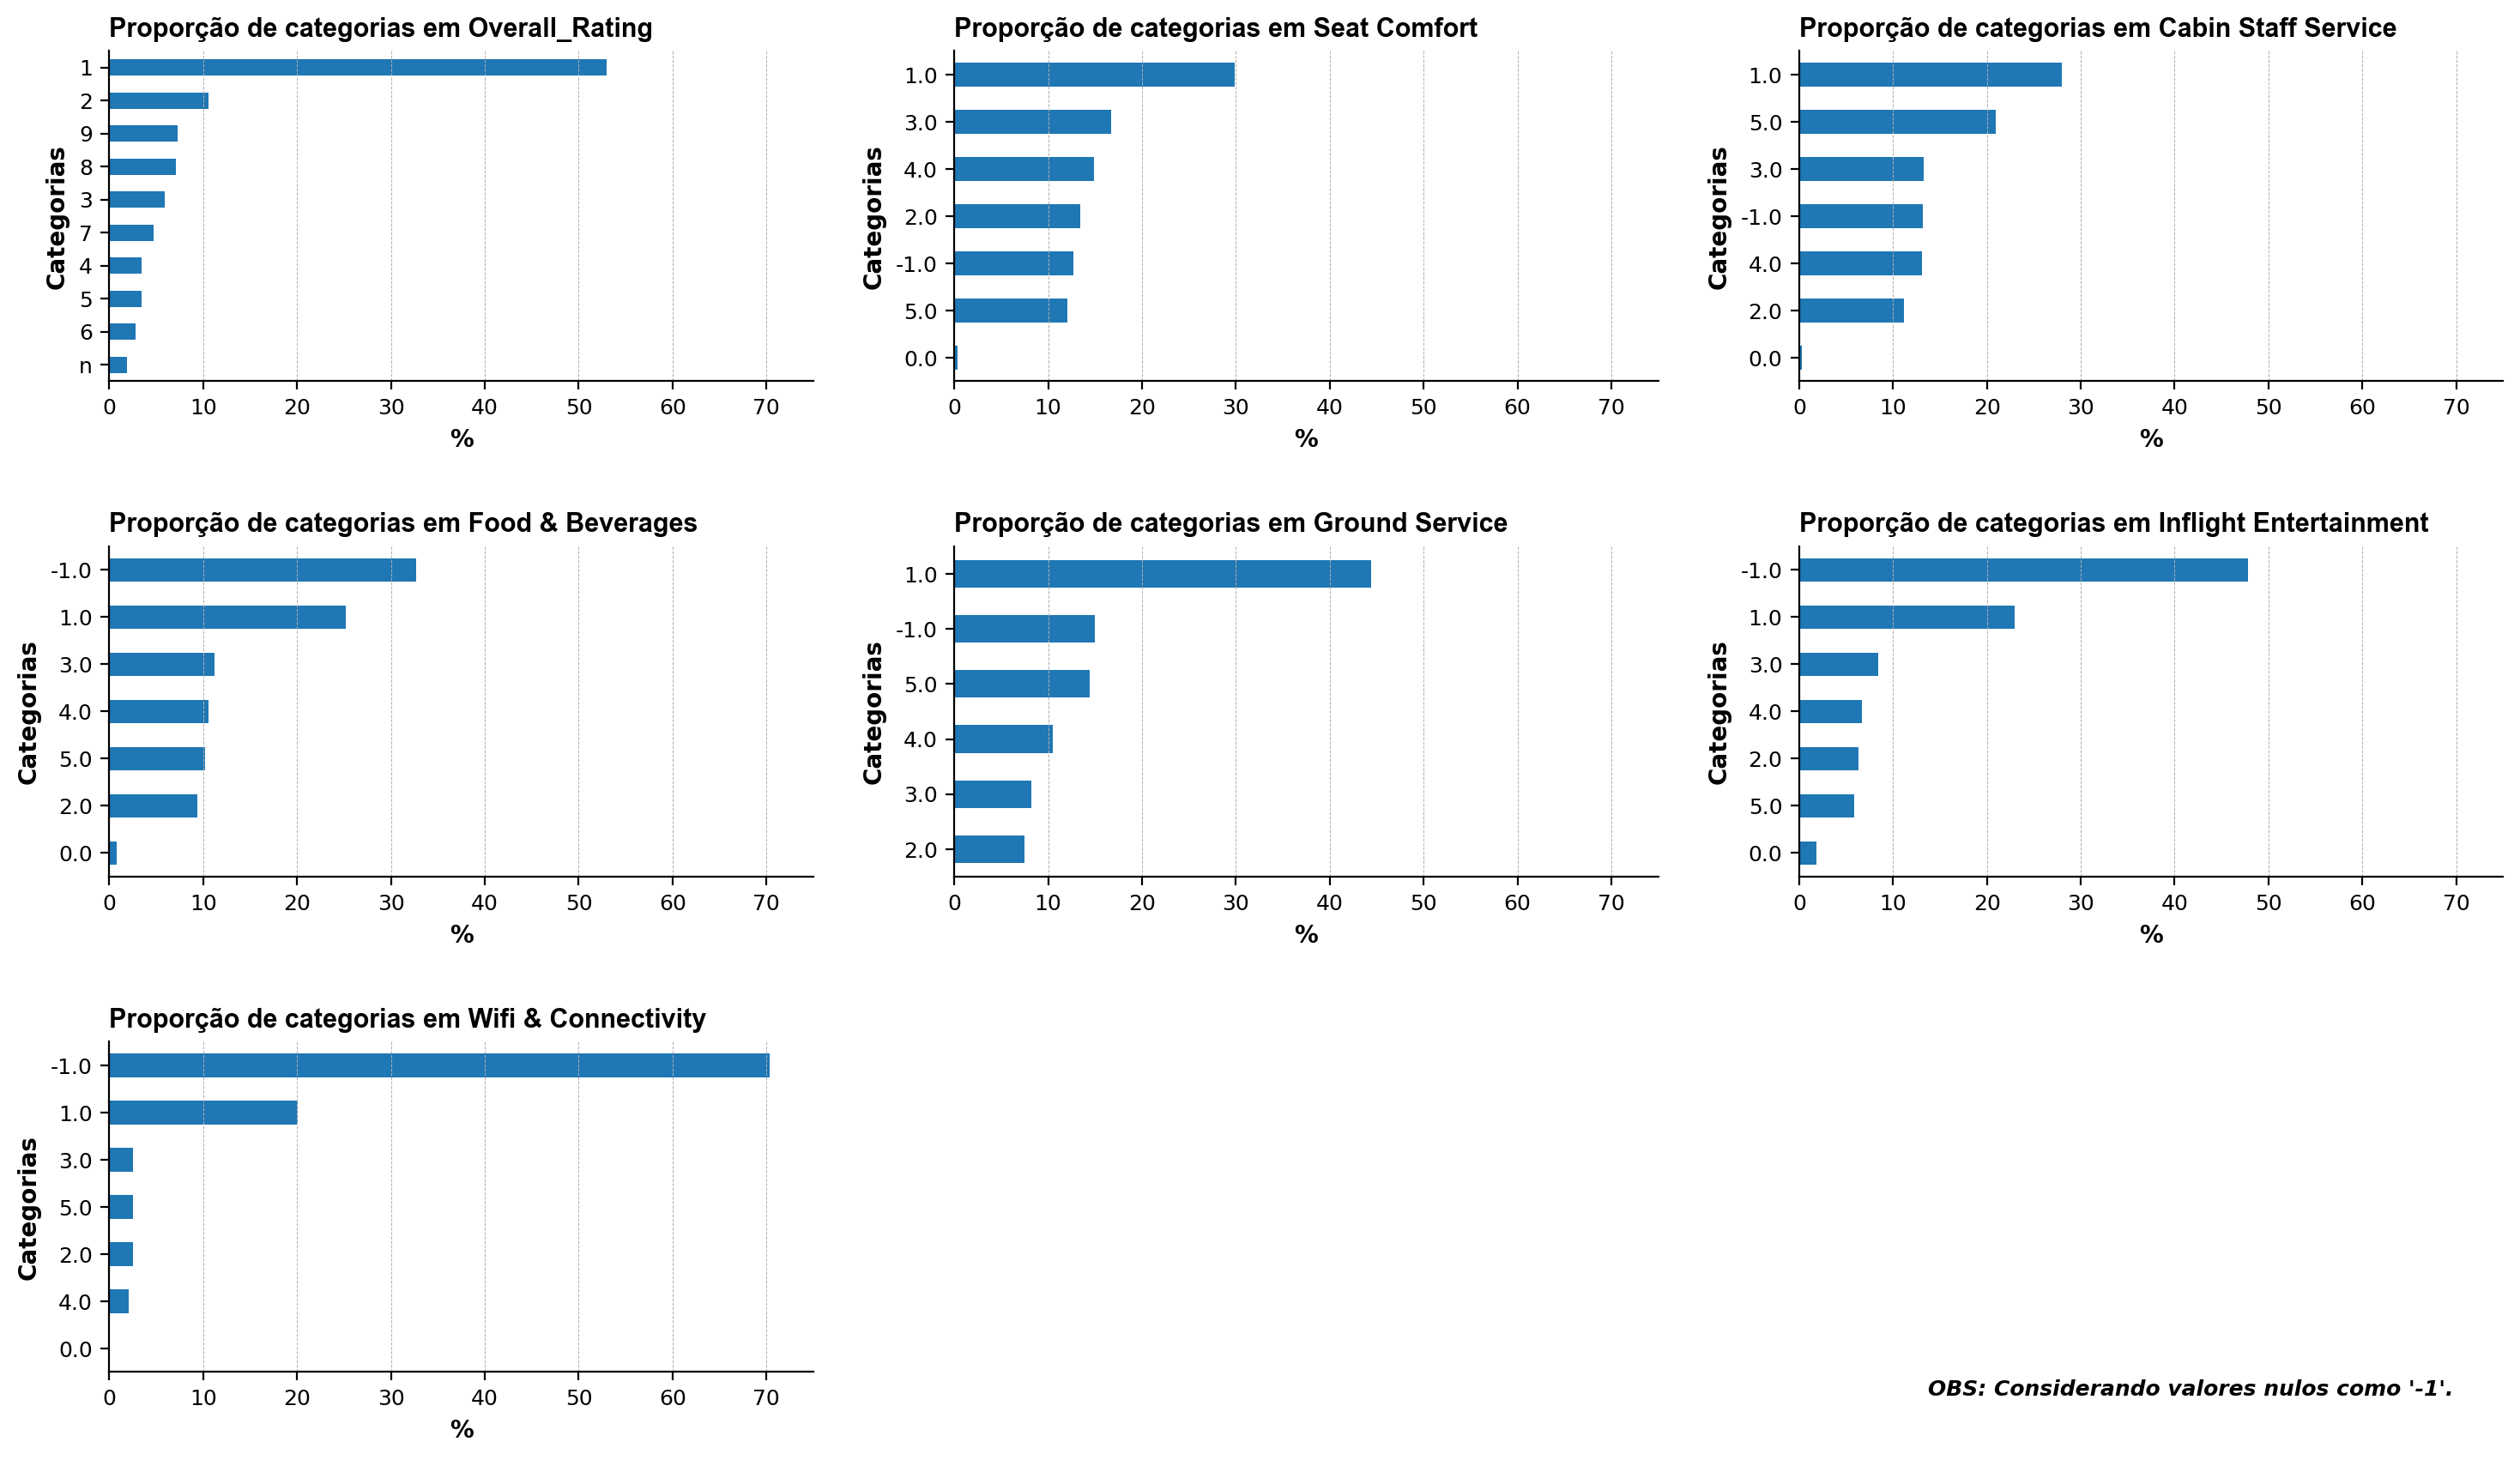

In [8]:
fig, axs = plt.subplots(3,3, figsize = (18,10))
axs = axs.reshape(3, 3)

# Considerando 'nan' como -1:

for i, col in enumerate(cols):
    row_idx = i // 3  
    col_idx = i % 3 
    
    df[col] \
        .fillna(-1) \
        .value_counts(normalize = True) \
        .apply(lambda x: x * 100) \
        .sort_values(ascending = True) \
        .plot(kind = 'barh', ax = axs[row_idx, col_idx])
    
    axs[row_idx, col_idx].set_title(f'Proporção de categorias em {col}', loc = 'left', fontsize = 11, fontfamily = 'arial', fontweight = 'bold')
    axs[row_idx, col_idx].set_ylabel('Categorias', fontweight = 'bold')
    axs[row_idx, col_idx].set_xlabel('%', fontweight = 'bold')
    axs[row_idx, col_idx].set_xlim((0,75))
    axs[row_idx, col_idx].spines['right'].set_visible(False)
    axs[row_idx, col_idx].spines['top'].set_visible(False)
    axs[row_idx, col_idx].xaxis.set_tick_params(labelsize = 9)
    axs[row_idx, col_idx].yaxis.set_tick_params(labelsize = 9)
    axs[row_idx, col_idx].grid(True, axis = 'x', linestyle='--', linewidth = .35)



for j in range(len(cols), 9):  
    row_idx = j // 3
    col_idx = j % 3
    axs[row_idx, col_idx].axis('off')


fig.text(.8, 0.1, "OBS: Considerando valores nulos como '-1'. ", ha = 'center', va = 'center', fontsize = 9, fontweight = 'bold', fontstyle = 'italic')

plt.subplots_adjust(hspace=0.5) 

É possível perceber a partir dos gráficos acima que os valores nulos estão bastante presentes nas colunas:  
- `Food & Beverages` cerca de **32%**
- `Inflight Entertainment`cerca de **48%**
- `Wifi & Connectivity` cerca de **70%**

Já as demais colunas possuem todas menos de **15%** de valores inválidos

**Decisão de tratamento**

A estratégia adotada para lidar com os dados inválidos dependerá da distribuição de frequências das categorias em cada variável, além da proporção de valores inválidos, visando perder
o mínimo de informação possível, para isso, resolvi usar as seguintes estratégias:

Para as colunas com até **15%** de valores inválidos:
- **Substituir os valores**
    - **Média**: Caso a distribução de frequências seja aproximadamente normal / simétrica
    - **Mediana ou Moda**: Caso a distribuição de frequências seja assimétrica.

Para as demais colunas (com muitos valores inválidos, acima de **40%**):
- **Substituir os valores**
    - **Mediana ou Moda**: Devido a natureza discreta das variáveis

- **Criar coluna adicional** 
    - **Marcação binária**: Se era valor inválido ou não antes do input dos valores.

Criar uma coluna adicional deve ajudar a orientar se os valores ausentes são importantes na classificação do review.

#### Inputando valores de colunas até 15% inválidos

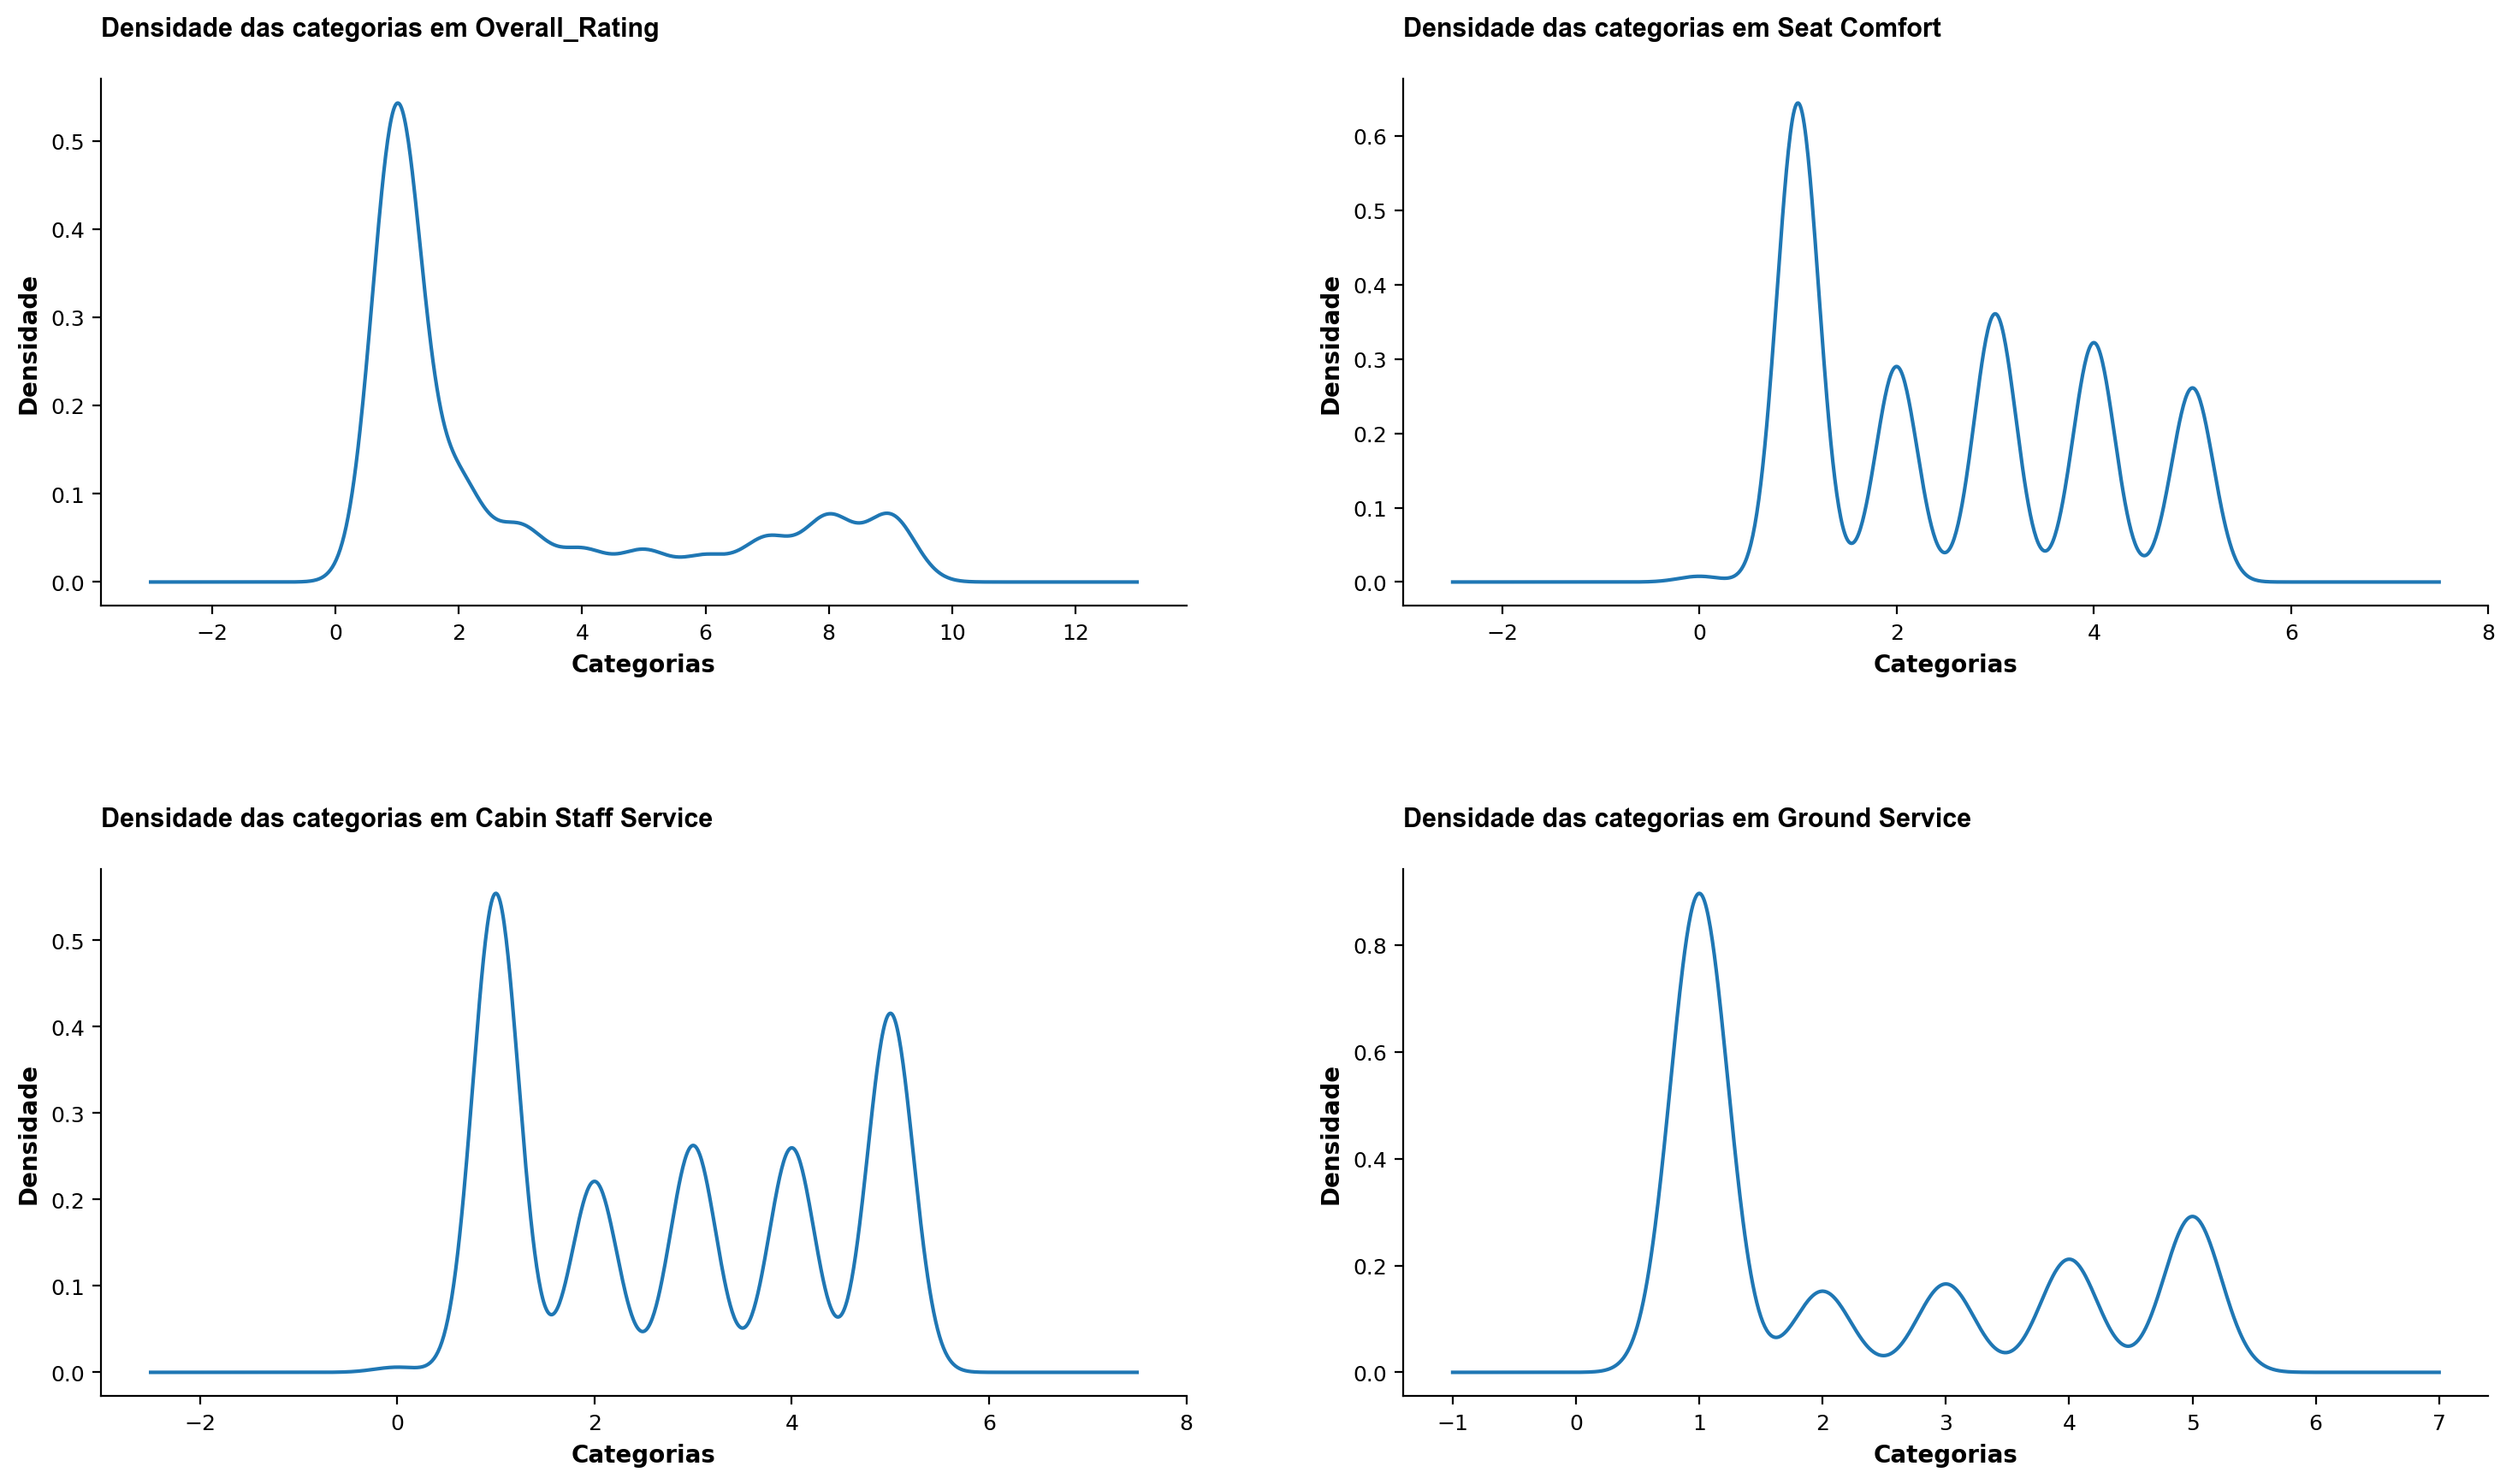

In [9]:
# Verificando distribuição aproximada das categorias nas variáveis

fig, axs = plt.subplots(2,2, figsize = (18,10))
axs = axs.reshape(2, 2)


# Selecionando colunas 
cols = ['Overall_Rating', 'Seat Comfort', 'Cabin Staff Service', 'Ground Service']


for i, col in enumerate(cols):
    row_idx = i // 2  
    col_idx = i % 2 

    if col == 'Overall_Rating':
        df[col] \
            .loc[df[col] != 'n'] \
            .astype(int) \
            .plot(kind = 'kde', ax = axs[row_idx, col_idx])
    else:
        df[col] \
            .dropna() \
            .astype(int) \
            .plot(kind = 'kde', ax = axs[row_idx, col_idx])
    
    axs[row_idx, col_idx].set_title(f'Densidade das categorias em {col} \n', loc = 'left', fontsize = 11, fontfamily = 'arial', fontweight = 'bold')
    axs[row_idx, col_idx].set_ylabel('Densidade', fontweight = 'bold')
    axs[row_idx, col_idx].set_xlabel('Categorias', fontweight = 'bold')
    axs[row_idx, col_idx].spines['right'].set_visible(False)
    axs[row_idx, col_idx].spines['top'].set_visible(False)
    axs[row_idx, col_idx].xaxis.set_tick_params(labelsize = 9)
    axs[row_idx, col_idx].yaxis.set_tick_params(labelsize = 9)



plt.subplots_adjust(hspace=0.5)  

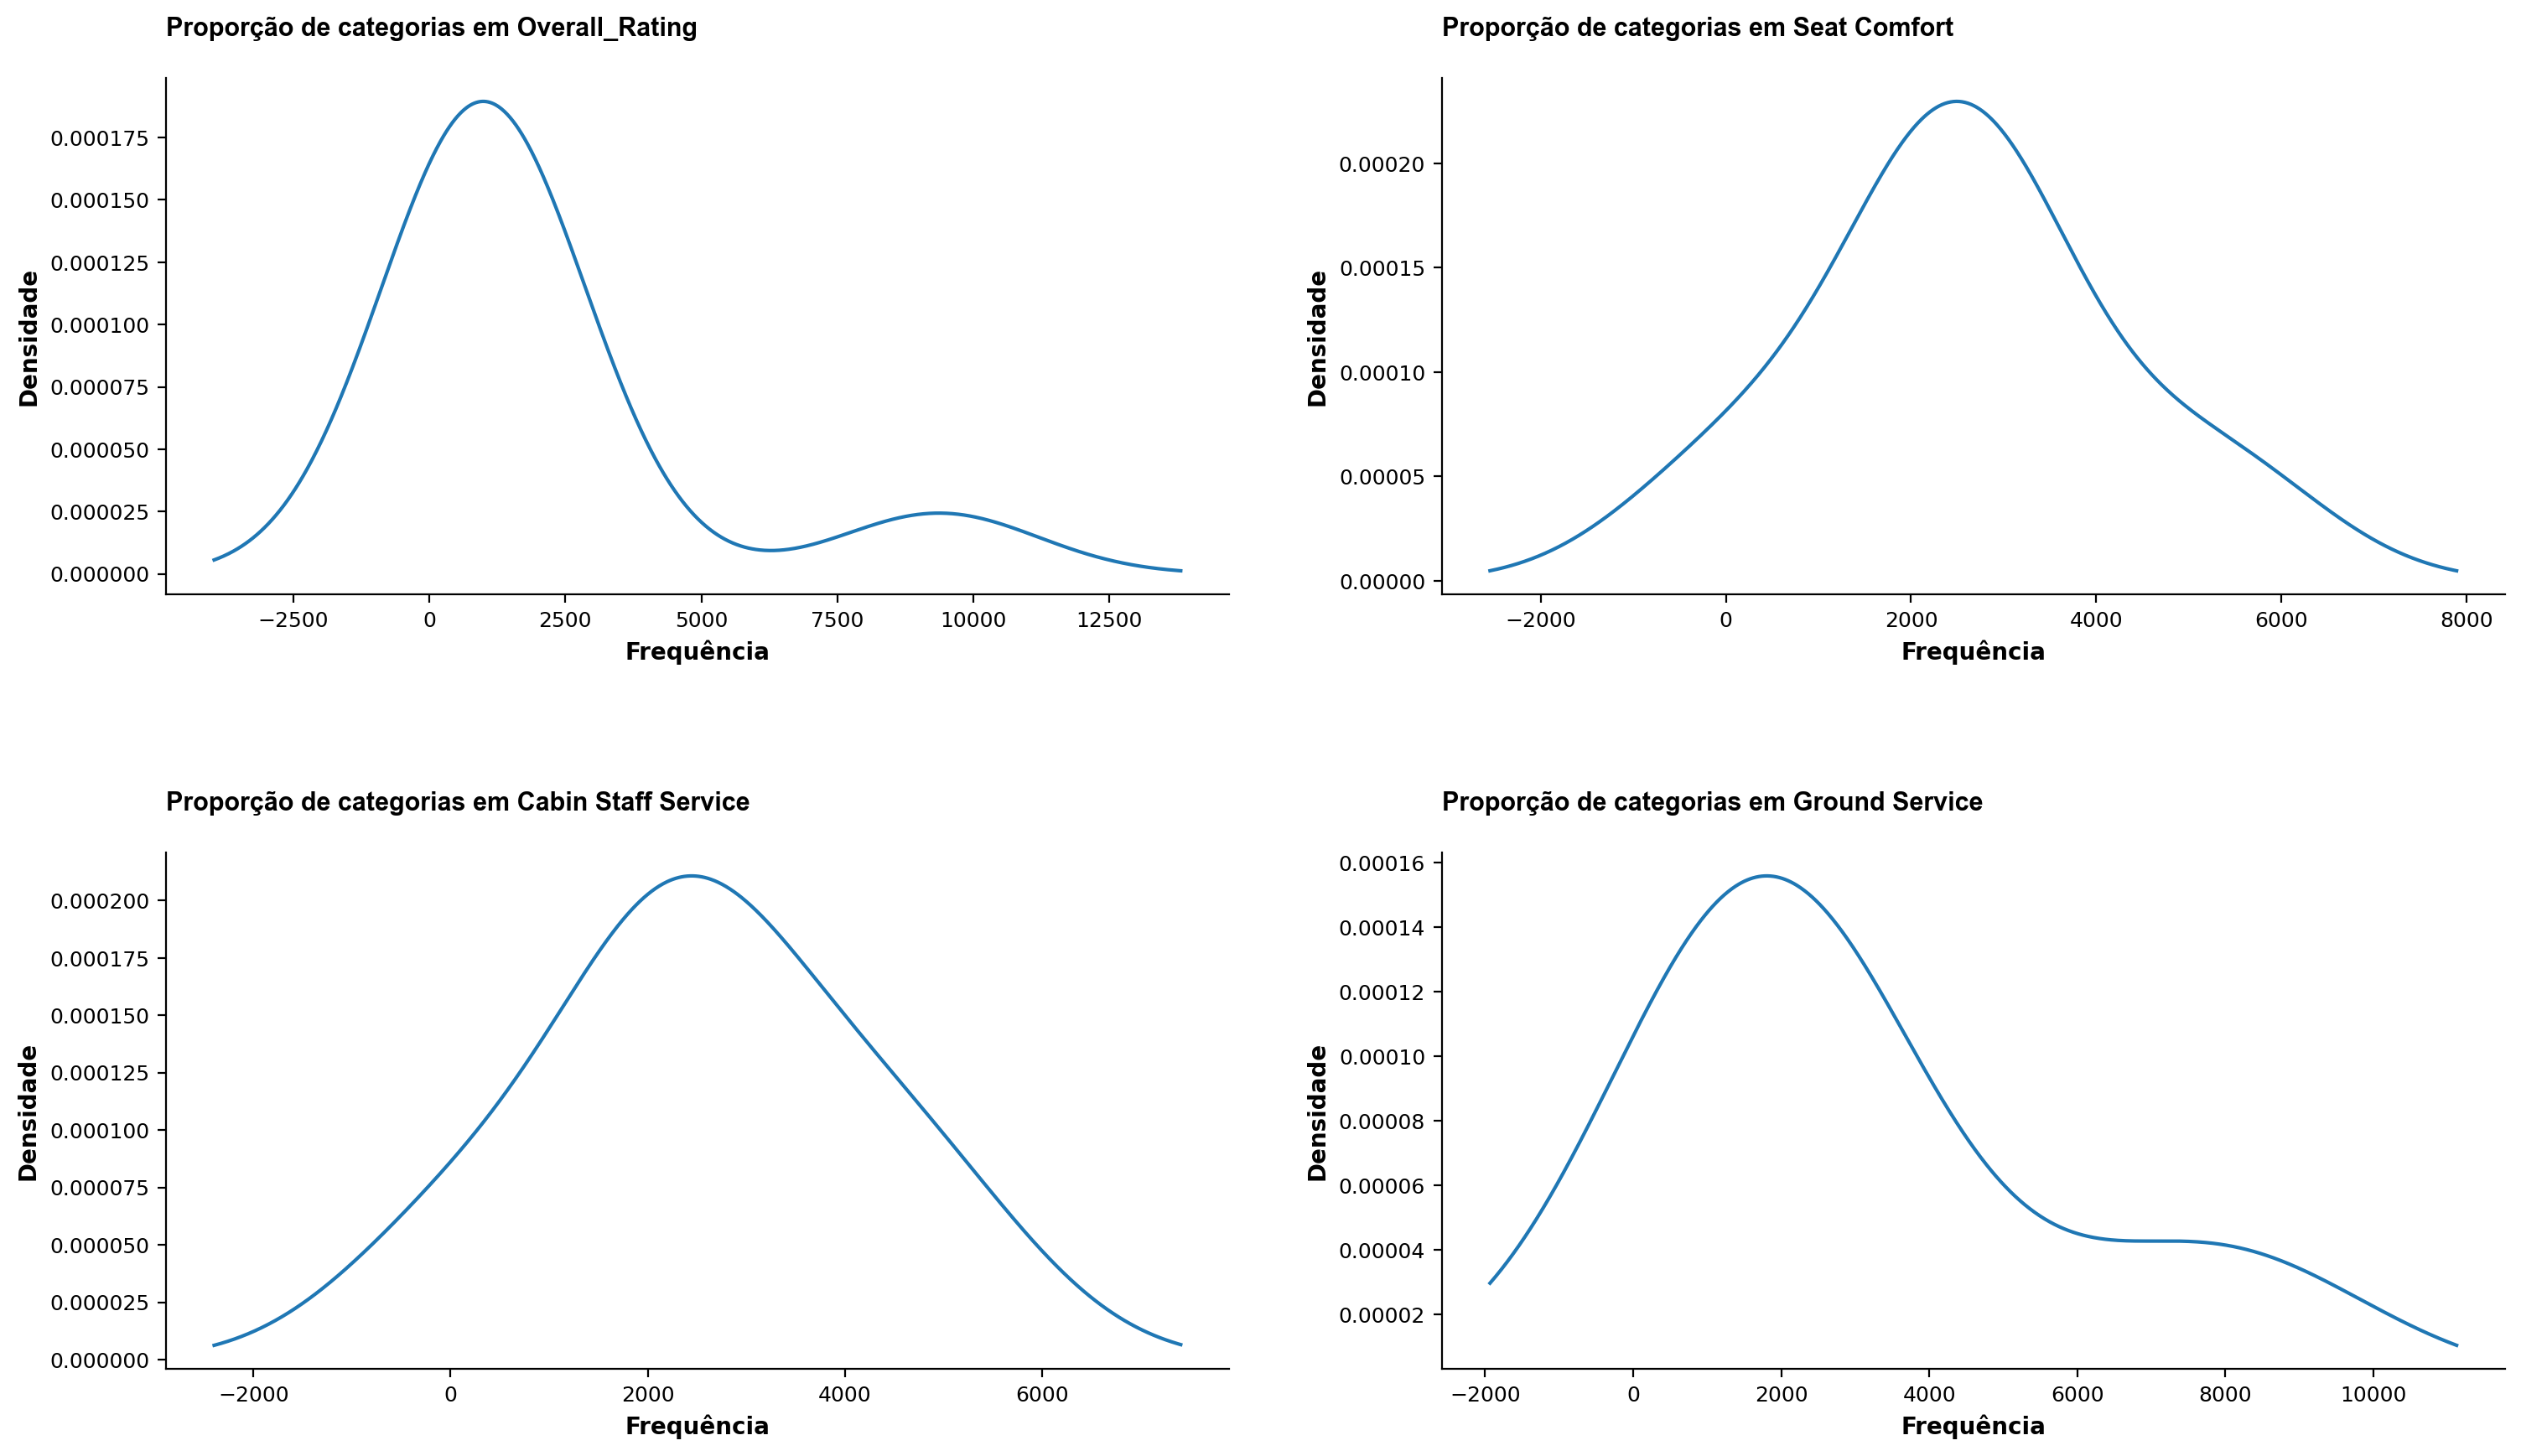

In [10]:
# Verificando distribuição aproximada das frequências das categorias

fig, axs = plt.subplots(2,2, figsize = (18,10))
axs = axs.reshape(2, 2)


# Selecionando colunas 
cols = ['Overall_Rating', 'Seat Comfort', 'Cabin Staff Service', 'Ground Service']


for i, col in enumerate(cols):
    row_idx = i // 2  
    col_idx = i % 2 

    if col == 'Overall_Rating':
        df[col] \
            .loc[df[col] != 'n'] \
            .astype(int) \
            .sort_values(ascending = True)\
            .value_counts() \
            .plot(kind = 'kde', ax = axs[row_idx, col_idx])
    else:
        df[col] \
            .dropna() \
            .astype(int) \
            .sort_values(ascending = True)\
            .value_counts() \
            .plot(kind = 'kde', ax = axs[row_idx, col_idx])
    
    axs[row_idx, col_idx].set_title(f'Proporção de categorias em {col} \n', loc = 'left', fontsize = 11, fontfamily = 'arial', fontweight = 'bold')
    axs[row_idx, col_idx].set_ylabel('Densidade', fontweight = 'bold')
    axs[row_idx, col_idx].set_xlabel('Frequência', fontweight = 'bold')
    axs[row_idx, col_idx].spines['right'].set_visible(False)
    axs[row_idx, col_idx].spines['top'].set_visible(False)
    axs[row_idx, col_idx].xaxis.set_tick_params(labelsize = 9)
    axs[row_idx, col_idx].yaxis.set_tick_params(labelsize = 9)


plt.subplots_adjust(hspace=0.5)  

A partir das visualizações anteriores, as colunas ``Seat Comfort`` e ``Cabin Staff Service`` parecem ser aproximadamente normais.
Portanto, os inputs serão dados por:
- ``Seat Comfort`` e ``Cabin Staff Service``: média
- `Overall_Rating` e `Ground Service`: mediana

In [11]:
# Inputando valores

df.loc[df['Seat Comfort'].isna(), 'Seat Comfort'] = int(df.loc[~df['Seat Comfort'].isna(), 'Seat Comfort'].astype(int).mean())
df.loc[df['Cabin Staff Service'].isna(), 'Cabin Staff Service'] = int(df.loc[~df['Cabin Staff Service'].isna(), 'Cabin Staff Service'].astype(int).mean())
df.loc[df['Overall_Rating'] == 'n', 'Overall_Rating'] = int(df.loc[df['Overall_Rating'] != 'n', 'Overall_Rating'].astype(int).median())
df.loc[df['Ground Service'].isna(), 'Ground Service'] = int(df.loc[~df['Ground Service'].isna(), 'Ground Service'].astype(int).median())

In [12]:
df.loc[df['Cabin Staff Service'].isna(), 'Cabin Staff Service'] # Verificando se ainda existem valores inválidos

Series([], Name: Cabin Staff Service, dtype: float64)

In [13]:
df.loc[df['Seat Comfort'].isna(), 'Seat Comfort'] # Verificando se ainda existem valores inválidos

Series([], Name: Seat Comfort, dtype: float64)

In [14]:
df.loc[df['Overall_Rating'].isna(), 'Overall_Rating'] # Verificando se ainda existem valores inválidos

Series([], Name: Overall_Rating, dtype: object)

In [15]:
df.loc[df['Ground Service'].isna(), 'Ground Service'] # Verificando se ainda existem valores inválidos

Series([], Name: Ground Service, dtype: float64)

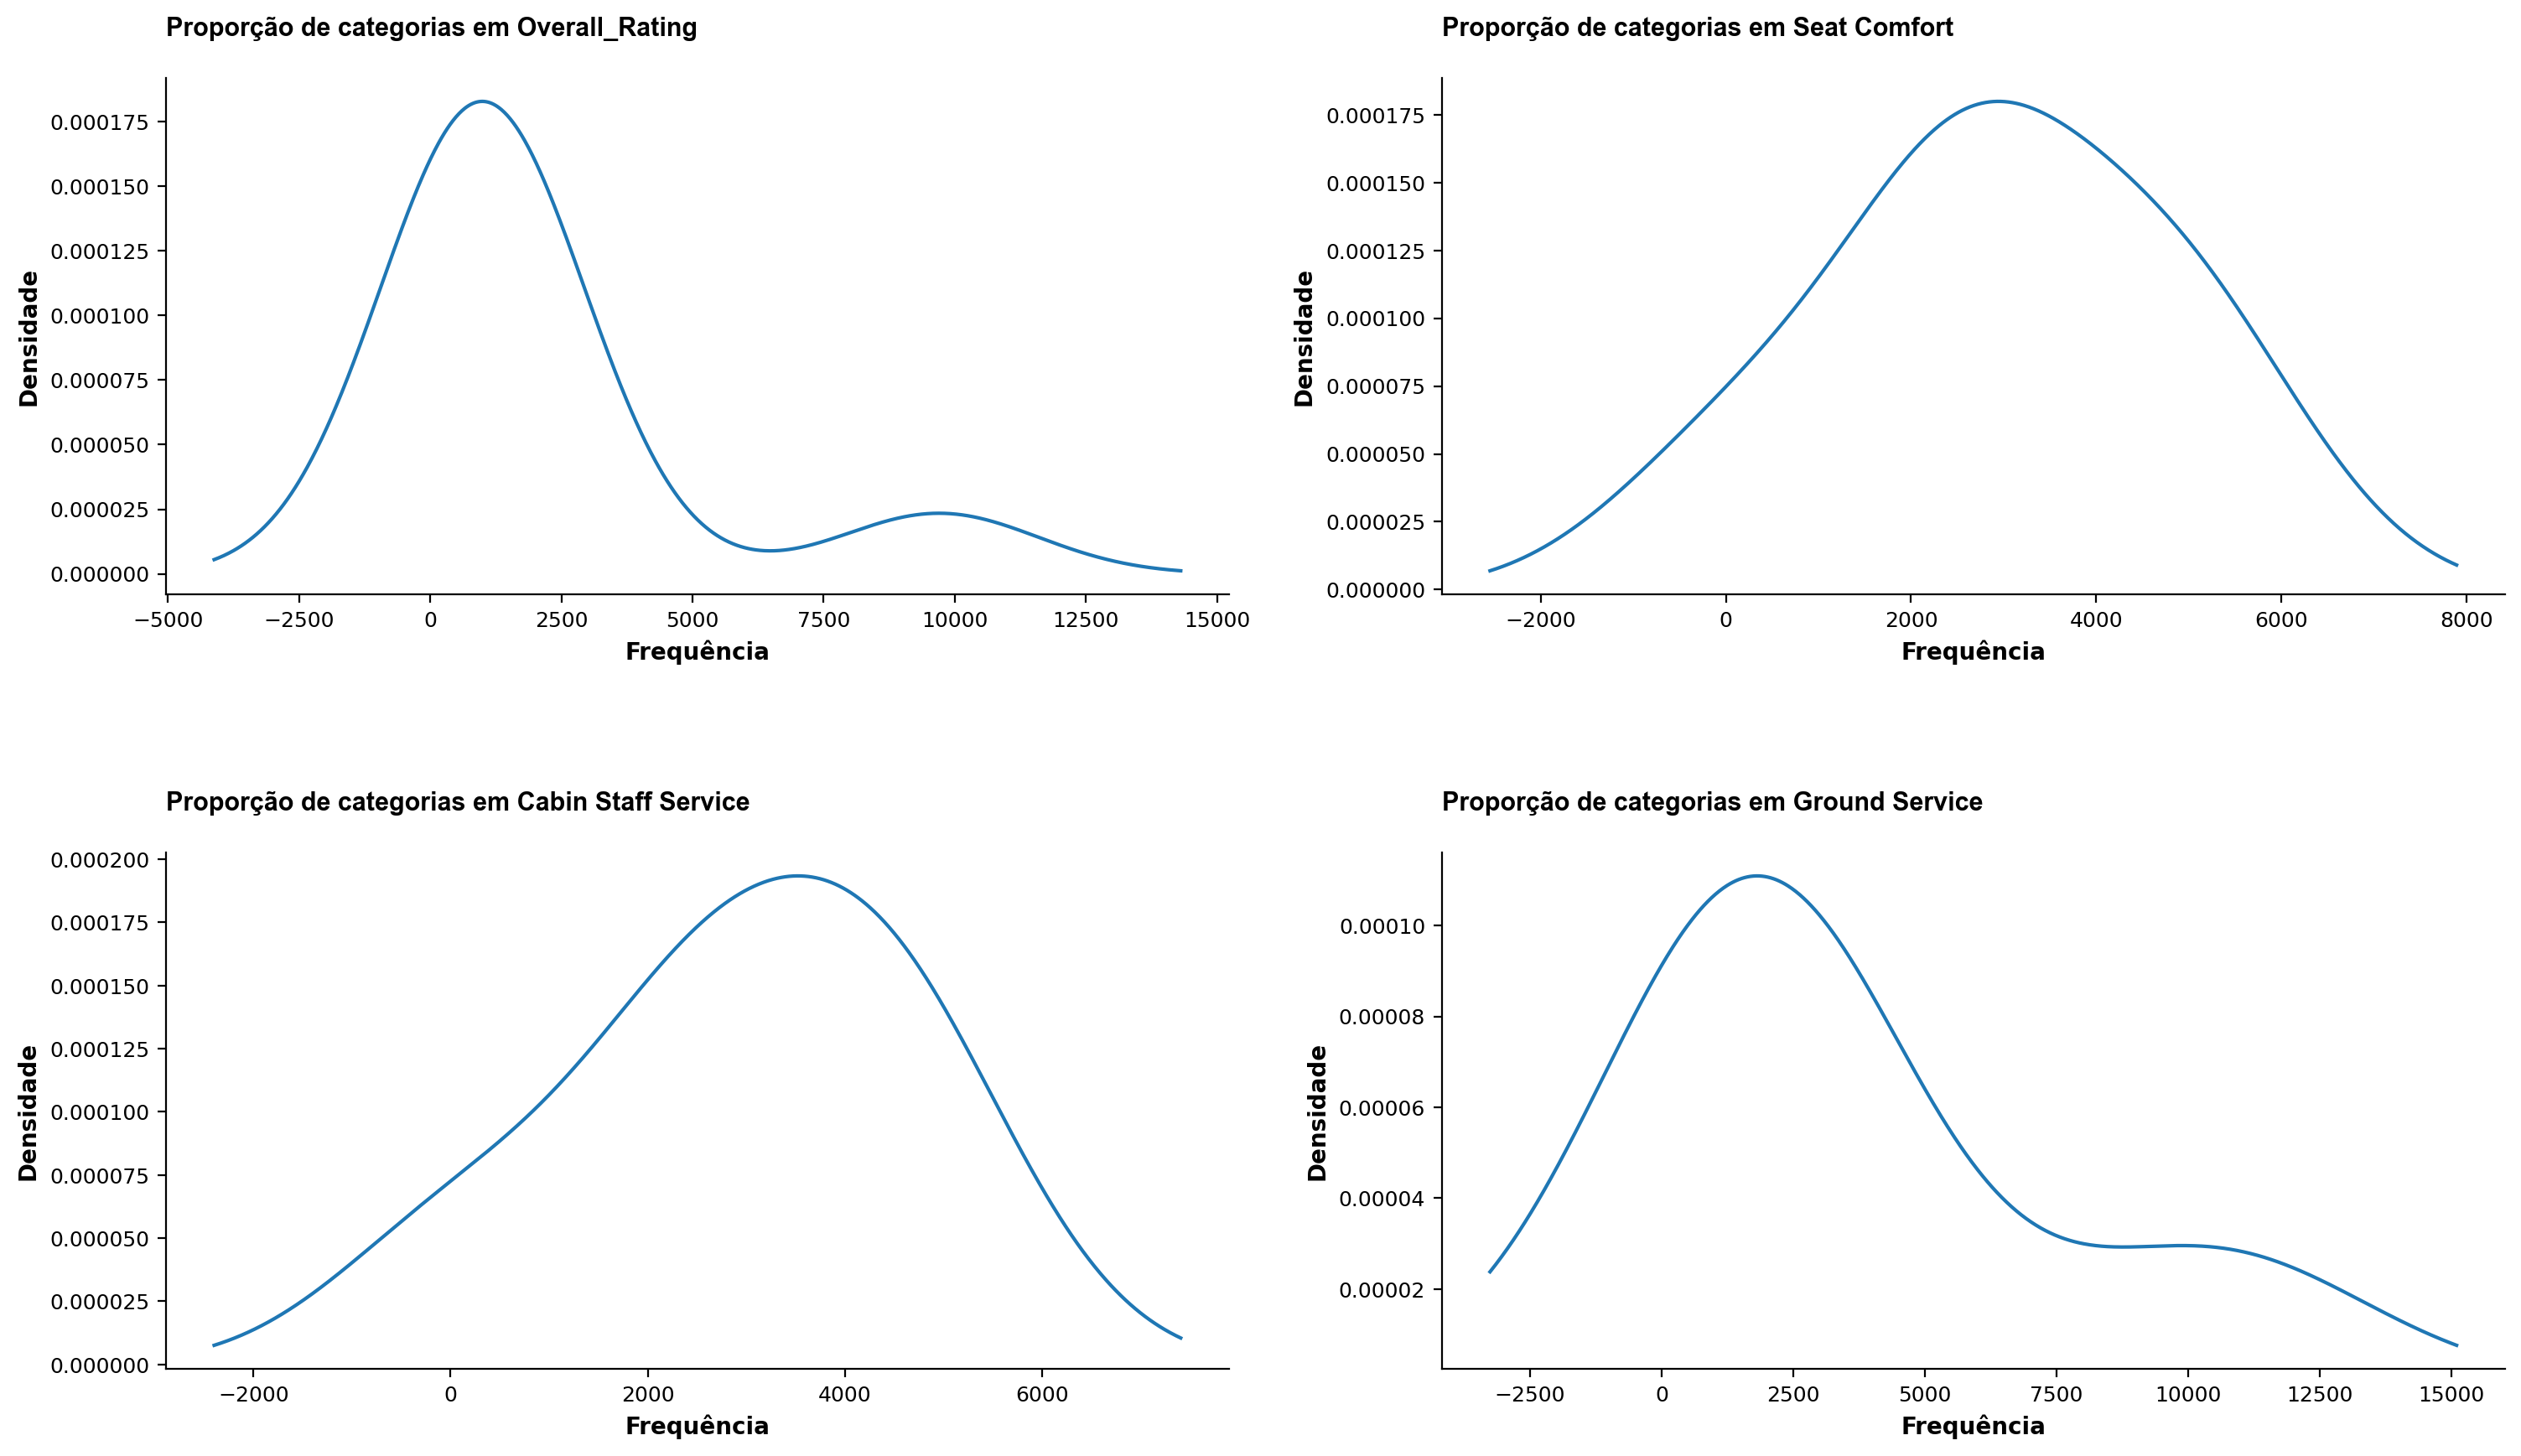

In [16]:
# Verificando o impacto do input nas distribuições

fig, axs = plt.subplots(2,2, figsize = (18,10))
axs = axs.reshape(2, 2)


# Selecionando colunas 
cols = ['Overall_Rating', 'Seat Comfort', 'Cabin Staff Service', 'Ground Service']


for i, col in enumerate(cols):
    row_idx = i // 2  
    col_idx = i % 2 

    if col == 'Overall_Rating':
        df[col] \
            .astype(int) \
            .sort_values(ascending = True)\
            .value_counts() \
            .plot(kind = 'kde', ax = axs[row_idx, col_idx])
    else:
        df[col] \
            .astype(int) \
            .sort_values(ascending = True)\
            .value_counts() \
            .plot(kind = 'kde', ax = axs[row_idx, col_idx])
    
    axs[row_idx, col_idx].set_title(f'Proporção de categorias em {col} \n', loc = 'left', fontsize = 11, fontfamily = 'arial', fontweight = 'bold')
    axs[row_idx, col_idx].set_ylabel('Densidade', fontweight = 'bold')
    axs[row_idx, col_idx].set_xlabel('Frequência', fontweight = 'bold')
    axs[row_idx, col_idx].spines['right'].set_visible(False)
    axs[row_idx, col_idx].spines['top'].set_visible(False)
    axs[row_idx, col_idx].xaxis.set_tick_params(labelsize = 9)
    axs[row_idx, col_idx].yaxis.set_tick_params(labelsize = 9)


plt.subplots_adjust(hspace=0.5)  

In [17]:
# Convertendo valores para inteiro

df['Overall_Rating'] = df['Overall_Rating'].astype(int)
df['Cabin Staff Service'] = df['Cabin Staff Service'].astype(int)
df['Ground Service'] = df['Ground Service'].astype(int)
df['Seat Comfort'] = df['Seat Comfort'].astype(int)

#### Inputando valores das demais colunas

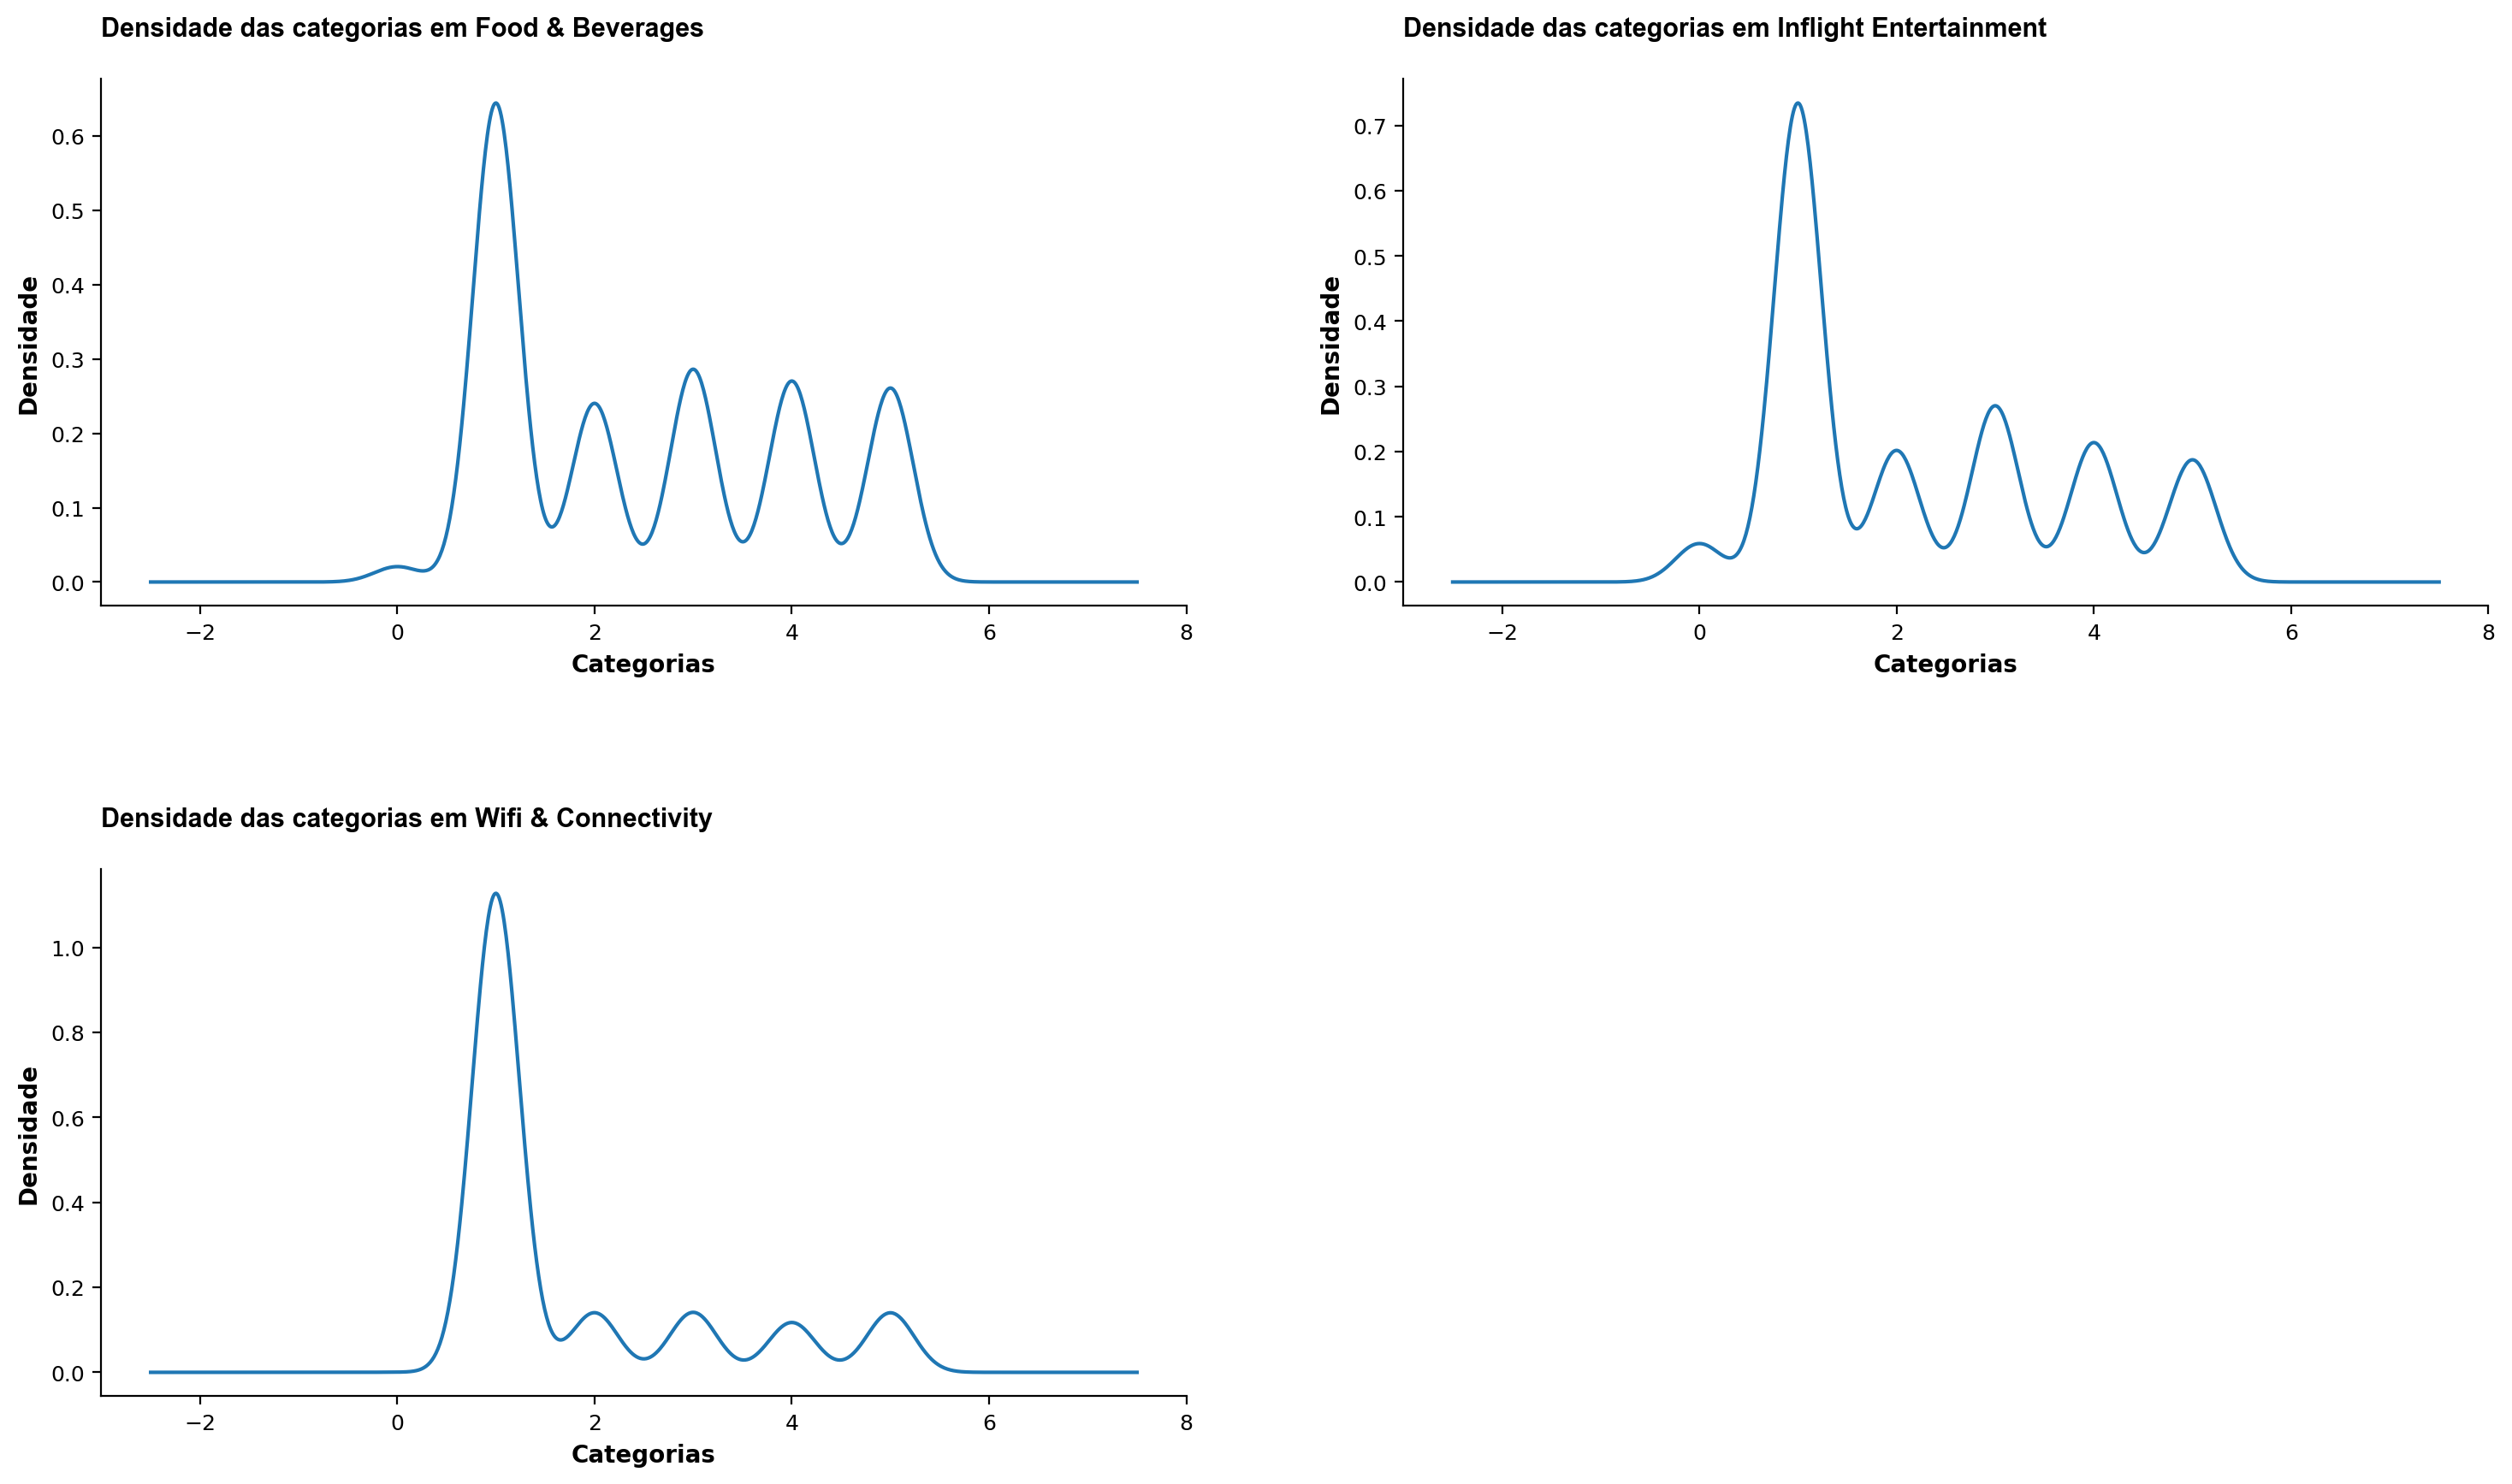

In [18]:
# Verificando distribuição aproximada das categorias nas variáveis

fig, axs = plt.subplots(2,2, figsize = (18,10))
axs = axs.reshape(2, 2)


# Selecionando colunas 
cols = ['Food & Beverages', 'Inflight Entertainment', 'Wifi & Connectivity']


for i, col in enumerate(cols):
    row_idx = i // 2  
    col_idx = i % 2 

    df[col] \
        .dropna() \
        .astype(int) \
        .plot(kind = 'kde', ax = axs[row_idx, col_idx])
    
    axs[row_idx, col_idx].set_title(f'Densidade das categorias em {col} \n', loc = 'left', fontsize = 11, fontfamily = 'arial', fontweight = 'bold')
    axs[row_idx, col_idx].set_ylabel('Densidade', fontweight = 'bold')
    axs[row_idx, col_idx].set_xlabel('Categorias', fontweight = 'bold')
    axs[row_idx, col_idx].spines['right'].set_visible(False)
    axs[row_idx, col_idx].spines['top'].set_visible(False)
    axs[row_idx, col_idx].xaxis.set_tick_params(labelsize = 9)
    axs[row_idx, col_idx].yaxis.set_tick_params(labelsize = 9)


for j in range(len(cols), 4):  
    row_idx = j // 2
    col_idx = j % 2
    axs[row_idx, col_idx].axis('off')


plt.subplots_adjust(hspace=0.5)  

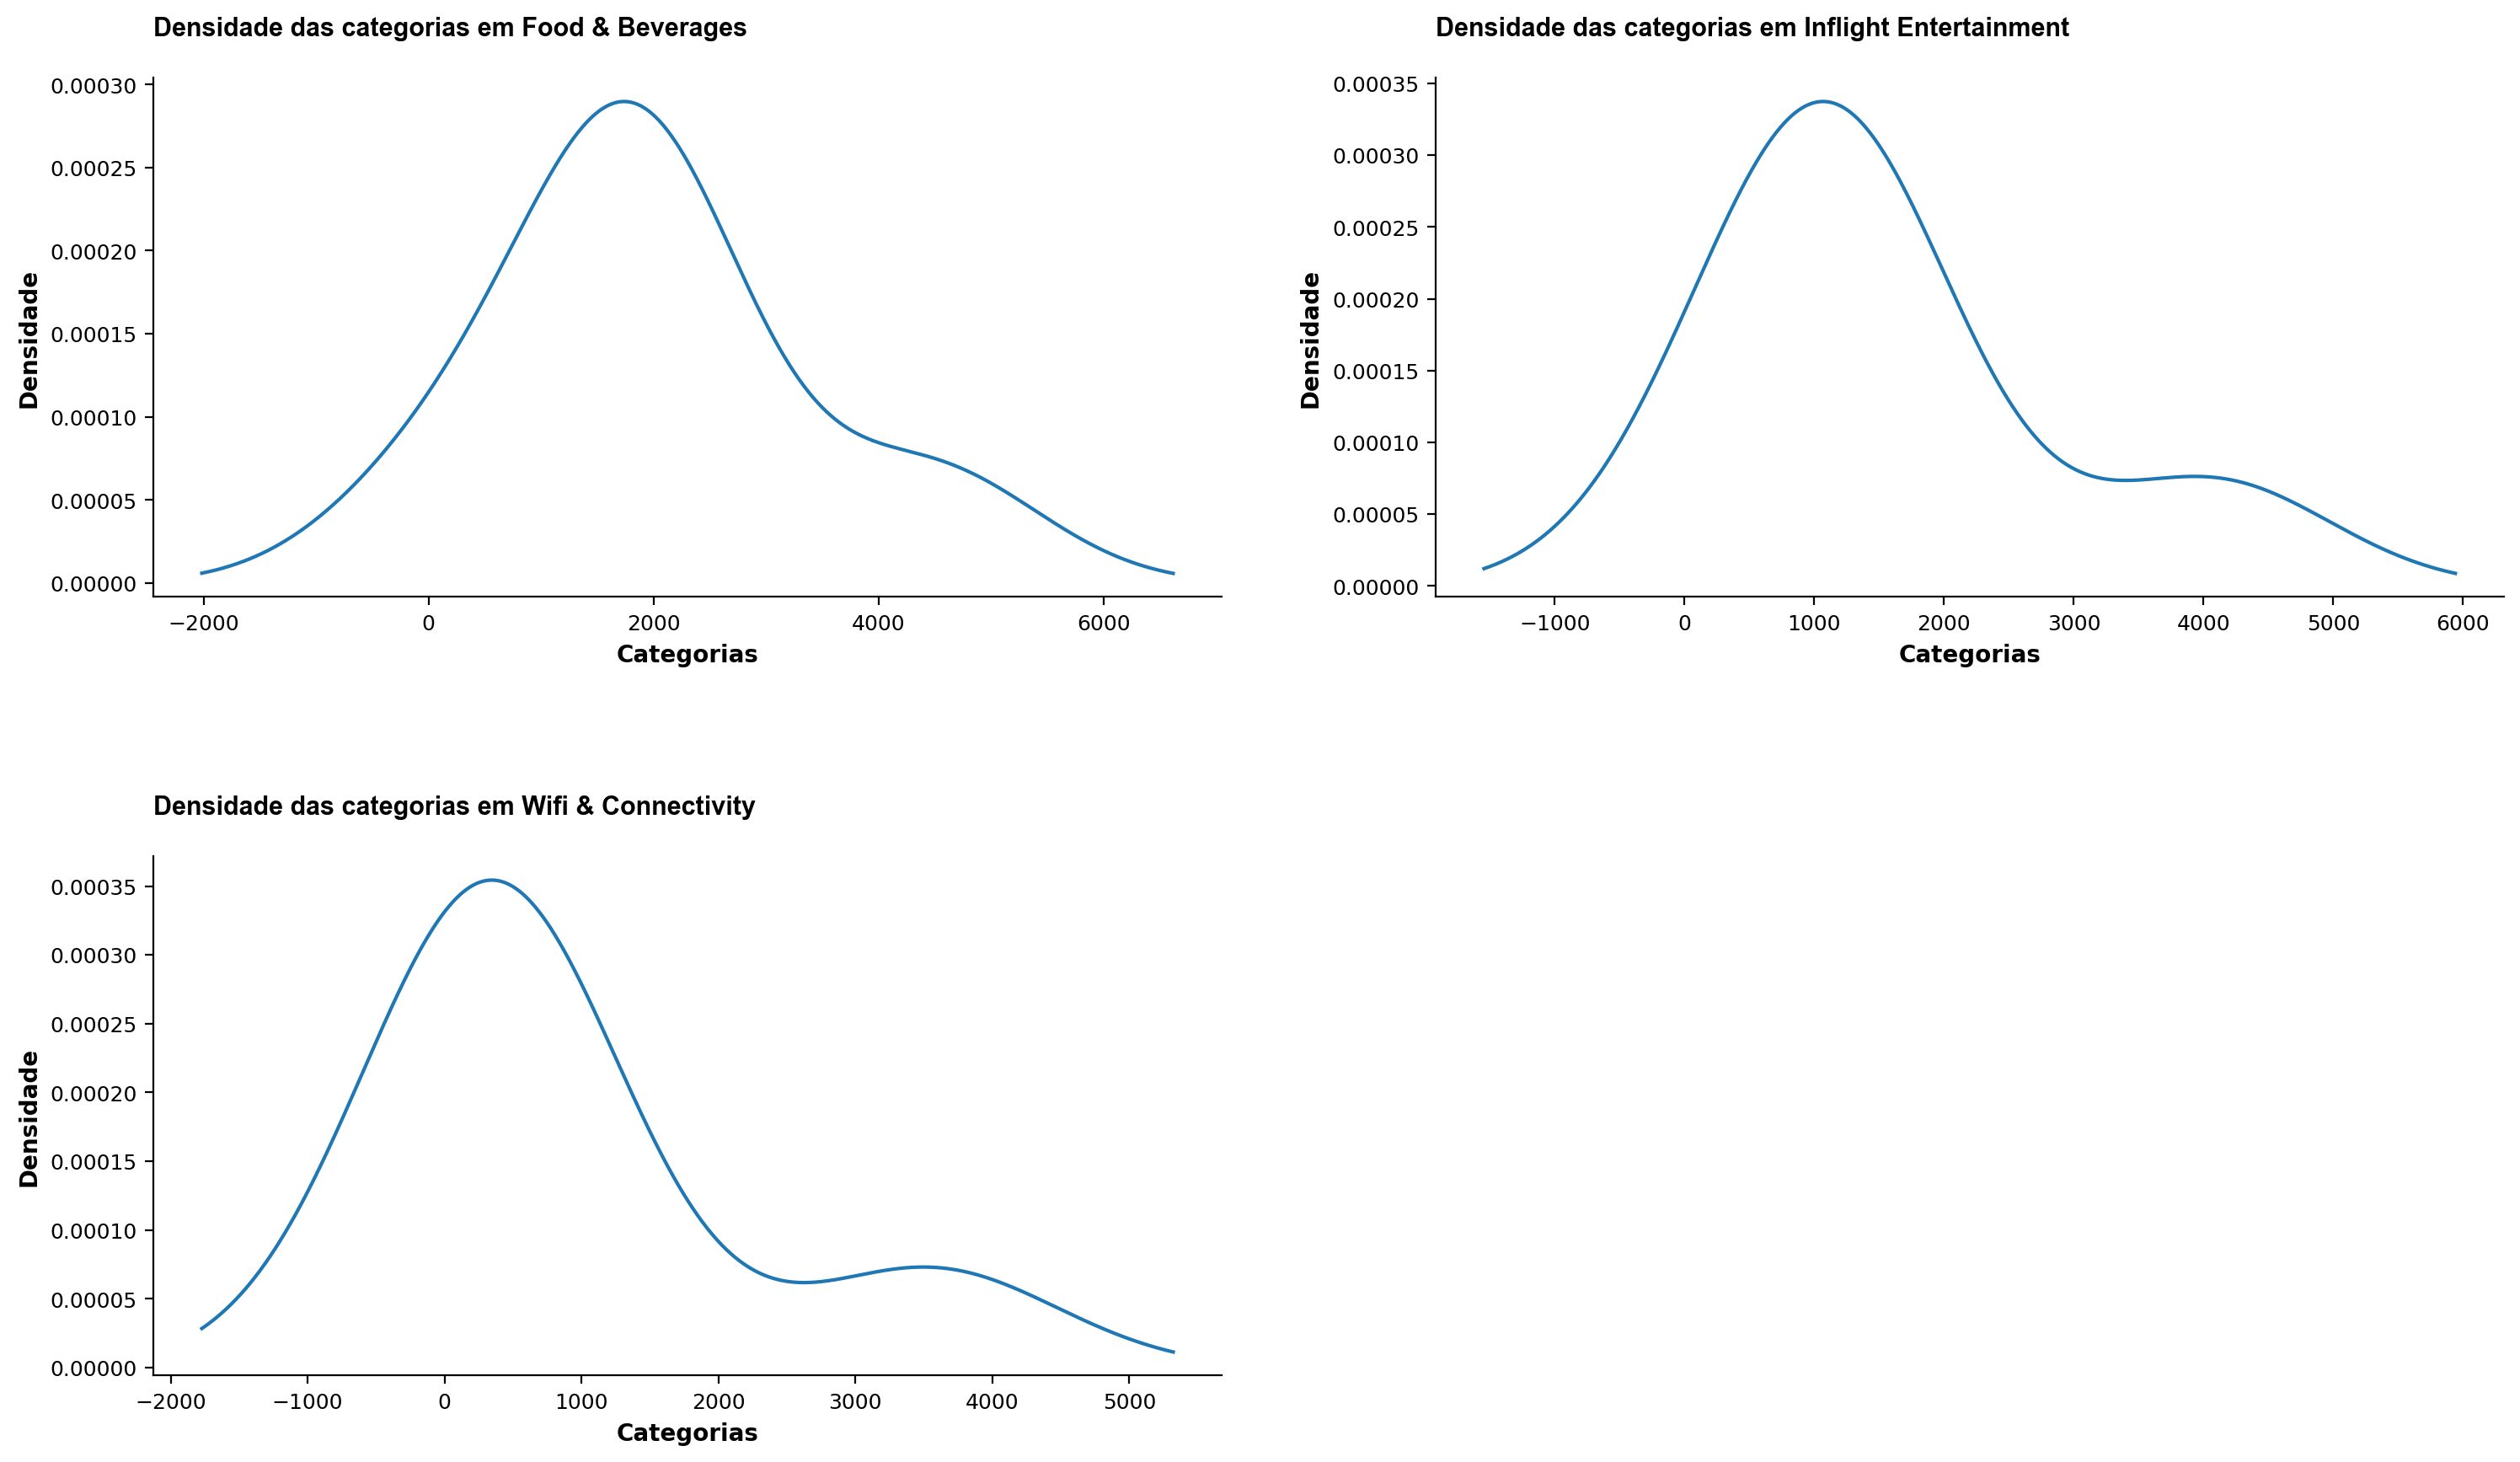

In [19]:
# Verificando distribuição aproximada das frequências das categorias

fig, axs = plt.subplots(2,2, figsize = (18,10))
axs = axs.reshape(2, 2)


# Selecionando colunas 
cols = ['Food & Beverages', 'Inflight Entertainment', 'Wifi & Connectivity']


for i, col in enumerate(cols):
    row_idx = i // 2  
    col_idx = i % 2 

    df[col] \
        .dropna() \
        .astype(int) \
        .sort_values(ascending = True)\
        .value_counts() \
        .plot(kind = 'kde', ax = axs[row_idx, col_idx])
    
    axs[row_idx, col_idx].set_title(f'Densidade das categorias em {col} \n', loc = 'left', fontsize = 11, fontfamily = 'arial', fontweight = 'bold')
    axs[row_idx, col_idx].set_ylabel('Densidade', fontweight = 'bold')
    axs[row_idx, col_idx].set_xlabel('Categorias', fontweight = 'bold')
    axs[row_idx, col_idx].spines['right'].set_visible(False)
    axs[row_idx, col_idx].spines['top'].set_visible(False)
    axs[row_idx, col_idx].xaxis.set_tick_params(labelsize = 9)
    axs[row_idx, col_idx].yaxis.set_tick_params(labelsize = 9)


for j in range(len(cols), 4):  
    row_idx = j // 2
    col_idx = j % 2
    axs[row_idx, col_idx].axis('off')

plt.subplots_adjust(hspace=0.5)  

Todas parecem possuir assimetria à direita, portanto, os seus inputs serão suas respectivas medianas

In [20]:
# Criando variáveis com marcação de valor ausente

df['FoodBeverages_isnan'] = df['Food & Beverages'].isna().astype(int)  
df['InflightEntertainment_isnan'] = df['Inflight Entertainment'].isna().astype(int)  
df['WifiConnectivity_isnan'] = df['Wifi & Connectivity'].isna().astype(int)  

In [21]:
# Inputando valores

df.loc[df['Food & Beverages'].isna(), 'Food & Beverages'] = int(df.loc[~df['Food & Beverages'].isna(), 'Food & Beverages'].astype(int).median())
df.loc[df['Inflight Entertainment'].isna(), 'Inflight Entertainment'] = int(df.loc[~df['Inflight Entertainment'].isna(), 'Inflight Entertainment'].astype(int).median())
df.loc[df['Wifi & Connectivity'].isna(), 'Wifi & Connectivity'] = int(df.loc[~df['Wifi & Connectivity'].isna(), 'Wifi & Connectivity'].astype(int).median())

In [22]:
# Convertendo para inteiro

df['Food & Beverages'] = df['Food & Beverages'].astype(int)
df['Inflight Entertainment'] = df['Inflight Entertainment'].astype(int)
df['Wifi & Connectivity'] = df['Wifi & Connectivity'].astype(int)

### Colunas de datas

In [23]:
df['Review Date'].unique()

array(['10th April 2011', '10th April 2012', '10th April 2014', ...,
       '9th September 2020', '9th September 2021', '9th September 2022'],
      dtype=object)

In [24]:
df['Date Flown'].unique()

array([nan, 'April 2016', 'December 2015', 'April 2017', 'March 2017',
       'March 2018', 'December 2018', 'April 2019', 'April 2020',
       'November 2019', 'March 2020', 'April 2021', 'December 2021',
       'April 2022', 'February 2023', 'April 2023', 'December 2022',
       'July 2015', 'August 2015', 'August 2017', 'July 2017',
       'June 2019', 'August 2019', 'July 2019', 'August 2020',
       'July 2020', 'June 2021', 'August 2021', 'August 2022',
       'July 2022', 'November 2015', 'December 2016', 'November 2016',
       'January 2017', 'December 2017', 'June 2018', 'November 2018',
       'December 2019', 'September 2019', 'December 2020', 'October 2020',
       'October 2022', 'November 2022', 'February 2016', 'September 2016',
       'February 2018', 'February 2019', 'February 2020', 'January 2020',
       'March 2019', 'November 2020', 'February 2021', 'February 2022',
       'January 2023', 'January 2016', 'January 2019', 'August 2018',
       'October 2019', 'Janua

In [25]:
df[df['Date Flown'].isna()].shape[0] # Possíveis voos cancelados ou datas vazias

1758

In [26]:
# Convertendo formato das colunas
## Formato %Y-%m-%d: Caso a coluna de datas possua informação sobre o dia
## Formato %Y-%m: Caso a coluna de datas não possua informação sobre o dia


def date_transform(string):
    if 'th' in string or 'rd' in string or 'st' in string or 'nd' in string:   
        return parser.parse(string).strftime('%Y-%m-%d')
    else:
        return parser.parse(string).strftime('%Y-%m')        

In [27]:
df.insert(4, 'Review_Date_conv', df['Review Date'].apply(date_transform))
df.sample(3)

,Airline Name,Overall_Rating,Review_Title,Review Date,Review_Date_conv,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,FoodBeverages_isnan,InflightEntertainment_isnan,WifiConnectivity_isnan
1937,Volaris,1,"""Worst airline in history""",13th July 2022,2022-07-13,Worst airline in history. Missed my connecti...,NaN,Solo Leisure,Economy Class,New York to Hermosillo via Guadalajara,July 2022,1,1,1,1,2,1,0,1,1
15184,TUI Airways,1,"""Would not recommend it at all""",5th July 2023,2023-07-05,Terrible experience from the minute I I got ...,Boeing 737,Solo Leisure,Economy Class,Birmingham to Santorini,June 2023,1,1,2,1,2,1,1,1,1
1339,SriLankan Airlines,1,"""very poor quality service""",12th January 2022,2022-01-12,The Flight was delayed and the SriLankan Air...,NaN,Solo Leisure,Economy Class,Melbourne to Colombo,December 2021,1,2,1,1,1,1,0,0,0


In [28]:
df.insert(11, 'Date_Flown_conv', df.loc[df['Date Flown'].notna(), 'Date Flown'].apply(date_transform))
df.sample(3)

,Airline Name,Overall_Rating,Review_Title,Review Date,Review_Date_conv,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Date_Flown_conv,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,FoodBeverages_isnan,InflightEntertainment_isnan,WifiConnectivity_isnan
1106,CSA Czech Airlines,2,"""A truly bad experience""",11th September 2018,2018-09-11,Prague to Amsterdam. Forced to check a carry...,A320,Couple Leisure,Economy Class,Prague to Amsterdam,September 2018,2018-09,3,3,1,1,2,1,0,1,1
1600,Thai AirAsia,9,"""Service quick, polite and courteous""",12th May 2023,2023-05-12,Chiang Mai to Bangkok. This is a domestic fl...,A320,Couple Leisure,Economy Class,Chiang Mai to Bangkok,May 2023,2023-05,3,5,3,4,2,1,0,1,1
16521,TUI Airways,9,"""Captain and crew were very informative""",7th November 2021,2021-11-07,Overall my flight with TUI was great. Captain...,Boeing 787-9 Dreamliner,Family Leisure,Economy Class,Birmingham to Las Palmas,October 2021,2021-10,4,5,4,1,4,1,0,0,1


In [29]:
df['Date_Flown_conv'].fillna(pd.to_datetime('1900-01-01'), inplace=True)

In [30]:
df['Review_Date_conv'] = pd.to_datetime(df['Review_Date_conv'], format = '%Y-%m-%d') 
df['Date_Flown_conv'] = pd.to_datetime(df['Date_Flown_conv'])

In [31]:
df.drop(columns = ['Review Date', 'Date Flown'], inplace = True)

## Nulos

In [32]:
df.isnull().sum()

Airline Name                       0
Overall_Rating                     0
Review_Title                       0
Review_Date_conv                   0
Review                             0
Aircraft                       12037
Type Of Traveller               1749
Seat Type                        241
Route                           1826
Date_Flown_conv                    0
Seat Comfort                       0
Cabin Staff Service                0
Food & Beverages                   0
Ground Service                     0
Inflight Entertainment             0
Wifi & Connectivity                0
FoodBeverages_isnan                0
InflightEntertainment_isnan        0
WifiConnectivity_isnan             0
dtype: int64

In [33]:
df.loc[df['Aircraft'].isna(), 'Aircraft'] = 'No Info'
df.loc[df['Type Of Traveller'].isna(), 'Type Of Traveller'] = 'No Info'
df.loc[df['Seat Type'].isna(), 'Seat Type'] = 'No Info'
df.loc[df['Route'].isna(), 'Route'] = 'No Info'

## Duplicadas

In [34]:
df[df.duplicated()].shape[0]

29

In [35]:
df[df.duplicated()]

,Airline Name,Overall_Rating,Review_Title,Review_Date_conv,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date_Flown_conv,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,FoodBeverages_isnan,InflightEntertainment_isnan,WifiConnectivity_isnan
514,Edelweiss Air,1,Edelweiss Air customer review,2003-09-10,I flew Edelweiss to Antalya a couple of days a...,No Info,No Info,No Info,No Info,1900-01-01,2,2,2,1,2,1,1,1,1
516,Kulula,1,Kulula customer review,2006-09-10,Great airline with its excellent prices and ca...,No Info,No Info,No Info,No Info,1900-01-01,2,2,2,1,2,1,1,1,1
1065,Luxair,1,Luxair customer review,2004-10-11,Economy from Manchester to Luxembourg. Very ni...,No Info,No Info,No Info,No Info,1900-01-01,2,2,2,1,2,1,1,1,1
1352,Luxair,4,Luxair customer review,2007-07-12,LUX-CDG on a ERJ and back on new Q400. As alwa...,No Info,No Info,No Info,No Info,1900-01-01,2,2,2,1,2,1,1,1,1
1549,Kulula,1,Kulula customer review,2007-05-12,Cape Town to Johannesburg. Very cheap ticket w...,No Info,No Info,No Info,No Info,1900-01-01,2,2,2,1,2,1,1,1,1
2034,Luxair,1,Luxair customer review,2006-03-13,Dublin-Manchester. Missed a flight with anothe...,No Info,No Info,No Info,No Info,1900-01-01,2,2,2,1,2,1,1,1,1
2074,Luxair,1,Luxair customer review,2007-05-13,Mixed feelings about Luxair. Onboard service i...,No Info,No Info,No Info,No Info,1900-01-01,2,2,2,1,2,1,1,1,1
2904,Luxair,1,Luxair customer review,2006-12-15,Man-Dublin on CRJ-145. Very comfy seats in lig...,No Info,No Info,No Info,No Info,1900-01-01,2,2,2,1,2,1,1,1,1
3178,Kulula,1,Kulula customer review,2006-03-15,On our honeymoon to SA we flew Kulula from Dur...,No Info,No Info,No Info,No Info,1900-01-01,2,2,2,1,2,1,1,1,1
4441,Luxair,1,Luxair customer review,2004-05-17,I take Luxair many times and I'am always pleas...,No Info,No Info,No Info,No Info,1900-01-01,2,2,2,1,2,1,1,1,1


In [36]:
df = df[~df.duplicated()]

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17673 entries, 0 to 17701
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Airline Name                 17673 non-null  object        
 1   Overall_Rating               17673 non-null  int64         
 2   Review_Title                 17673 non-null  object        
 3   Review_Date_conv             17673 non-null  datetime64[ns]
 4   Review                       17673 non-null  object        
 5   Aircraft                     17673 non-null  object        
 6   Type Of Traveller            17673 non-null  object        
 7   Seat Type                    17673 non-null  object        
 8   Route                        17673 non-null  object        
 9   Date_Flown_conv              17673 non-null  datetime64[ns]
 10  Seat Comfort                 17673 non-null  int64         
 11  Cabin Staff Service          17673 non-null  i

In [39]:
df.to_csv(os.path.join(project_data_path, 'processed', 'Travel_Challenge_processed.csv'))

Aparentemente os valores duplicados também possuem muitas das colunas como `NaN`, além disso, por se tratar de apenas 29 linhas do conjunto de dados, optei por retirar essas linhas.